<a href="https://colab.research.google.com/github/gkdivya/EVA/blob/main/7_AdvancedConcepts/experiments/Albumentations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring Albumentations

**Objective** : To explore albumentation library and perform Image augmentations by applying:
> *   horizontal flip
> *   shiftScaleRotate 
> *   coarseDropout (max_holes = 1, max_height=16px, max_width=1, min_holes = 1, min_height=16px, min_width=16px, fill_value=(mean of your dataset), mask_fill_value = None)
> *   grayscale



In [6]:
!pip install albumentations==1.0.0
import albumentations 

     |████████████████████████████████| 102kB 5.5MB/s 
     |████████████████████████████████| 38.2MB 226kB/s 
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as  np
%matplotlib inline
import albumentations as A
from albumentations.pytorch import ToTensorV2

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [2]:
import torchvision

class Cifar10Dataset(torchvision.datasets.CIFAR10):
    def __init__(self, root="./data", train=True, download=True, transform=None):
        super().__init__(root=root, train=train, download=download, transform=transform)

    def __getitem__(self, index):
        image, label = self.data[index], self.targets[index]

        if self.transform is not None:
            transformed = self.transform(image=image)
            image = transformed["image"]

        return image, label

In [3]:
horizontalflip_prob= 0.2
rotate_limit= 15
shiftscalerotate_prob= 0.25
num_holes= 1
cutout_prob= 0.5
mean=[0.4914, 0.4822, 0.4465]
std=[0.247, 0.243, 0.261]

In [4]:
transform_train = A.Compose(
    [A.HorizontalFlip(p=horizontalflip_prob),
     A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=rotate_limit, p=shiftscalerotate_prob),
     A.CoarseDropout(max_holes=num_holes,min_holes = 1, max_height=16, max_width=16, 
     p=cutout_prob,fill_value=tuple([x * 255.0 for x in mean]),
     min_height=16, min_width=16),
     A.ColorJitter(p=0.25,brightness=0.3, contrast=0.3, saturation=0.30, hue=0.2),
     A.ToGray(p=0.15),
     A.Normalize(mean = mean, std = std, max_pixel_value=255, always_apply = True),
     ToTensorV2()
    ])
    

transform_valid = A.Compose(
    [
     A.Normalize(
            mean=[0.4914, 0.4822, 0.4465],
            std=[0.247, 0.243, 0.261],
            max_pixel_value=255,
        ),
     ToTensorV2()
    ])


trainset = Cifar10Dataset(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = Cifar10Dataset(root='./data', train=False,
                                       download=True, transform=transform_valid)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [5]:
def visualize_augmentations(dataset, idx=1, samples=50, cols=10):
    dataset = copy.deepcopy(dataset)
    dataset.transform = A.Compose([t for t in dataset.transform if not isinstance(t, (A.Normalize, ToTensorV2))])
    rows = samples // cols
    figure, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(8, 4))
    for i in range(samples):
      for j in range(0, 1):
        image, _ = dataset[j]
        ax.ravel()[i].imshow(image)
        ax.ravel()[i].set_axis_off()
    plt.tight_layout()
    plt.show() 

Visualizing Augmented Images 



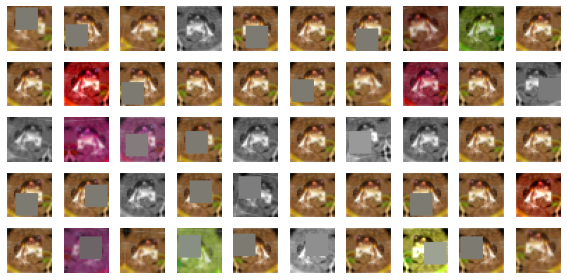

In [7]:
import random
from collections import defaultdict
import copy
random.seed(40)
%matplotlib inline
from matplotlib import pyplot as plt
visualize_augmentations(trainset)